In [1]:
import pandas as pd, numpy as np,seaborn as sns

In [2]:
data = pd.read_csv('clean_dataset.csv')

In [3]:
data.head(5)

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,690.0,0.695652,0.460464,0.00,0.000,1.00,1.0000,1.00
Age,690.0,31.514116,11.860245,13.75,22.670,28.46,37.7075,80.25
Debt,690.0,4.758725,4.978163,0.00,1.000,2.75,7.2075,28.00
Married,690.0,0.760870,0.426862,0.00,1.000,1.00,1.0000,1.00
BankCustomer,690.0,0.763768,0.425074,0.00,1.000,1.00,1.0000,1.00
YearsEmployed,690.0,2.223406,3.346513,0.00,0.165,1.00,2.6250,28.50
PriorDefault,690.0,0.523188,0.499824,0.00,0.000,1.00,1.0000,1.00
Employed,690.0,0.427536,0.495080,0.00,0.000,0.00,1.0000,1.00
CreditScore,690.0,2.400000,4.862940,0.00,0.000,0.00,3.0000,67.00
DriversLicense,690.0,0.457971,0.498592,0.00,0.000,0.00,1.0000,1.00


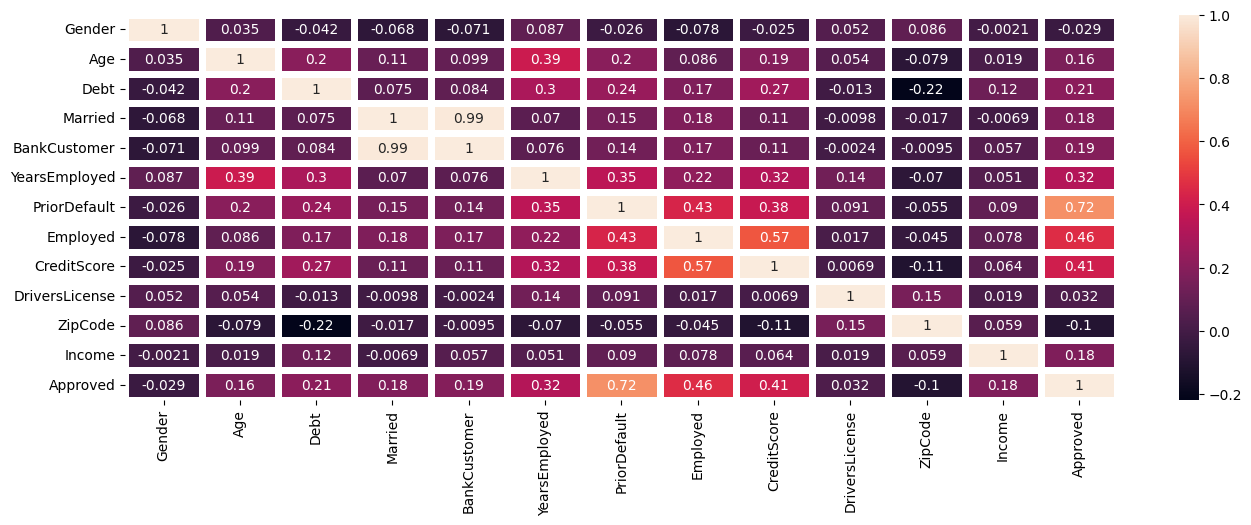

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,5))
sns.heatmap(data.select_dtypes(include=np.number).corr(),annot=True,linewidths=5);

## Object Datatype To Numeric

In [7]:
[data.Industry.unique(),
data.Citizen.unique(),
data.Ethnicity.unique()]

[array(['Industrials', 'Materials', 'CommunicationServices', 'Transport',
        'InformationTechnology', 'Financials', 'Energy', 'Real Estate',
        'Utilities', 'ConsumerDiscretionary', 'Education',
        'ConsumerStaples', 'Healthcare', 'Research'], dtype=object),
 array(['ByBirth', 'ByOtherMeans', 'Temporary'], dtype=object),
 array(['White', 'Black', 'Asian', 'Latino', 'Other'], dtype=object)]

<Axes: xlabel='Approved', ylabel='Industry'>

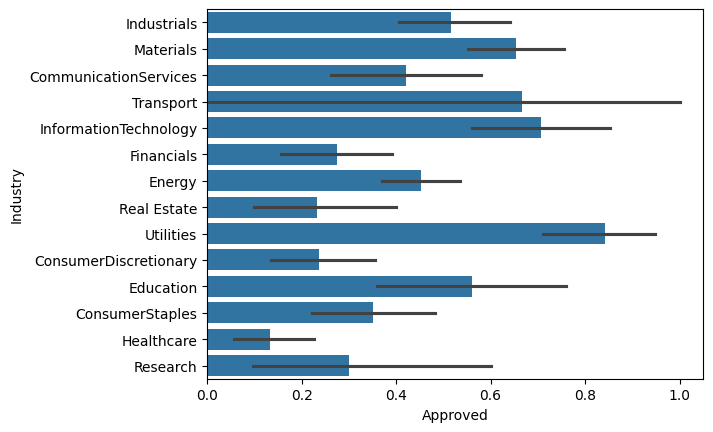

In [8]:
sns.barplot(data,x="Approved",y="Industry")

In [9]:
clean_data = data.copy()

In [10]:
clean_data = pd.get_dummies(clean_data,columns=['Industry','Citizen','Ethnicity'],drop_first=True,prefix="is_",dtype=int)

In [11]:
clean_data.head(2)

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,...,is__Real Estate,is__Research,is__Transport,is__Utilities,is__ByOtherMeans,is__Temporary,is__Black,is__Latino,is__Other,is__White
0,1,30.83,0.00,1,1,1.25,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,58.67,4.46,1,1,3.04,1,1,6,0,...,0,0,0,0,0,0,1,0,0,0


In [12]:
#Dummy degiskeni tuzagi bulunmuyor.

In [13]:
clean_data.dtypes

Gender                         int64
Age                          float64
Debt                         float64
Married                        int64
BankCustomer                   int64
YearsEmployed                float64
PriorDefault                   int64
Employed                       int64
CreditScore                    int64
DriversLicense                 int64
ZipCode                        int64
Income                         int64
Approved                       int64
is__ConsumerDiscretionary      int64
is__ConsumerStaples            int64
is__Education                  int64
is__Energy                     int64
is__Financials                 int64
is__Healthcare                 int64
is__Industrials                int64
is__InformationTechnology      int64
is__Materials                  int64
is__Real Estate                int64
is__Research                   int64
is__Transport                  int64
is__Utilities                  int64
is__ByOtherMeans               int64
i

In [14]:
# Data Select
X = clean_data.drop("Approved",axis=1)
y = clean_data.Approved

## Data Balance

In [15]:
clean_data.Approved.value_counts()

Approved
0    383
1    307
Name: count, dtype: int64

In [16]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_b,y_b = smote.fit_resample(X,y)

In [17]:
y_b.value_counts()

Approved
1    383
0    383
Name: count, dtype: int64

In [18]:
# Data scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X_b)
X_b = scaler.transform(X_b)

In [19]:
# Data Split
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(X_b,y_b,random_state=42,test_size=0.3)

In [40]:
# Prediction Model Creation
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
models = dict(
    lr_model = LogisticRegression(),
    rf_model = RandomForestClassifier(),
    lgbm_model = LGBMClassifier(),
    xgboost = XGBClassifier(),
    nn_model = MLPClassifier()
)

In [41]:
for model in models.values():
    model.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 275, number of negative: 261
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000163 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 584
[LightGBM] [Info] Number of data points in the train set: 536, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.513060 -> initscore=0.052251
[LightGBM] [Info] Start training from score 0.052251
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

/usr/local/Cellar/jupyterlab/4.0.8_1/libexec/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [42]:
for k,v in models.items():
    print("{} has score => {}".format(k,v.score(x_test,y_test)))

lr_model has score => 0.8652173913043478
rf_model has score => 0.8521739130434782
lgbm_model has score => 0.8695652173913043
xgboost has score => 0.8695652173913043
nn_model has score => 0.8826086956521739


In [43]:
#Model Tuning
models["nn_model"].get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

[CV] END ...................learning_rate=0.01, max_depth=-1; total time=   0.0s
[CV] END ....................learning_rate=0.01, max_depth=1; total time=   0.0s
[CV] END ....................learning_rate=0.01, max_depth=1; total time=   0.0s
[CV] END ....................learning_rate=0.01, max_depth=3; total time=   0.1s
[CV] END ....................learning_rate=0.01, max_depth=5; total time=   0.1s
[CV] END ....................learning_rate=0.01, max_depth=7; total time=   0.2s
[CV] END ....................learning_rate=0.01, max_depth=7; total time=   0.2s
[CV] END .....................learning_rate=0.1, max_depth=3; total time=   0.1s
[CV] END .....................learning_rate=0.1, max_depth=3; total time=   0.1s
[CV] END .....................learning_rate=0.1, max_depth=7; total time=   0.1s
[CV] END .....................learning_rate=0.1, max_depth=7; total time=   0.1s
[CV] END ....................learning_rate=0.03, max_depth=5; total time=   0.1s
[CV] END ...................

In [49]:
from sklearn.model_selection import GridSearchCV

xgboost_params = {"hidden_layer_sizes":[(100,),(200,),(50,)],"max_iter":[50,100,200,300]}
grid = GridSearchCV(models["nn_model"],xgboost_params,cv=10,verbose=2,n_jobs=-1).fit(x_train,y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


/usr/local/Cellar/jupyterlab/4.0.8_1/libexec/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/Cellar/jupyterlab/4.0.8_1/libexec/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/Cellar/jupyterlab/4.0.8_1/libexec/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/Cellar/jupyterlab/4.0.8_1/libexec/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the opti

In [50]:
grid.best_params_

{'hidden_layer_sizes': (50,), 'max_iter': 50}

In [51]:
tuning_model = MLPClassifier(**grid.best_params_).fit(x_train,y_train)

/usr/local/Cellar/jupyterlab/4.0.8_1/libexec/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


In [52]:
tuning_model.score(x_test,y_test)

0.8739130434782608

## The best model is Random Forest with %90 Truth Rate